In [1]:

from toolz.curried import *


import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

from cycler import cycler

color=['0.0', '0.4', '0.8']
default_cycler = (cycler(color=color))
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

plt.rc('axes', prop_cycle=default_cycler)

/var/folders/pz/bvpq88x94b1c7g8rq2gf4j3r0000gn/T/ipykernel_76391/135040291.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ONLINE MARKETING: what would have happened withotr online mkt
outcome variable: app downloads
treatment is implemented in some tested cities


In [2]:

# import data called online_mkt.csv inside same folder
# convert date column to datetime64[ns] type
# show first 5 rows
df = pd.read_csv('online_mkt.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,app_download,population,city,state,date,post,treated
0,3066.0,12396372,sao_paulo,sao_paulo,2022-03-01,0,1
1,2701.0,12396372,sao_paulo,sao_paulo,2022-03-02,0,1
2,1927.0,12396372,sao_paulo,sao_paulo,2022-03-03,0,1
3,1451.0,12396372,sao_paulo,sao_paulo,2022-03-04,0,1
4,1248.0,12396372,sao_paulo,sao_paulo,2022-03-05,0,1


In [3]:

treated = list(df.query("treated==1")["city"].unique())
treated

['sao_paulo', 'porto_alegre', 'joao_pessoa']

In [4]:

nottreated = list(df.query("treated==0")["city"].unique())
nottreated

['rio_de_janeiro',
 'brasilia',
 'salvador',
 'fortaleza',
 'belo_horizonte',
 'manaus',
 'curitiba',
 'recife',
 'goiania',
 'belem',
 'guarulhos',
 'campinas',
 'sao_luis',
 'sao_goncalo',
 'maceio',
 'duque_de_caxias',
 'campo_grande',
 'natal',
 'teresina',
 'sao_bernardo_do_campo',
 'nova_iguacu',
 'sao_jose_dos_campos',
 'santo_andre',
 'ribeirao_preto',
 'jaboatao_dos_guararapes',
 'uberlandia',
 'osasco',
 'sorocaba',
 'contagem',
 'aracaju',
 'feira_de_santana',
 'cuiaba',
 'joinville',
 'aparecida_de_goiania',
 'londrina',
 'juiz_de_fora',
 'porto_velho',
 'ananindeua',
 'serra',
 'caxias_do_sul',
 'macapa',
 'niteroi',
 'florianopolis',
 'belford_roxo',
 'campos_dos_goytacazes',
 'vila_velha',
 'maua']

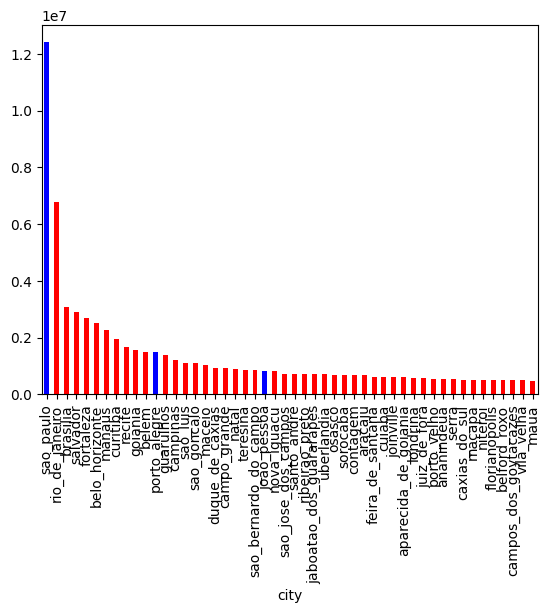

In [5]:
# see the value of the population per city, also the max treated value 
# and the max not treated value
cities_pop = df.groupby('city').agg({'population':'max', 'treated':'max'}) 

# in a graph I will show the top 50 cities with the highest population and the colour of the bard would be the treated 
# or not treated value
cities_pop.sort_values('population', ascending=False).head(50).plot.bar(y='population', color=cities_pop.sort_values('population', ascending=False)['treated'].map({0:'r', 1:'b'}), legend=False)

plt.show()



we see that Sao Paulo is a city that has significantly more population than other cities, and therefore the absolute number of app dwnloads might not be a good indicator

Lets normalize the value by the market size

In [6]:
df_norm = df.assign(
    app_download_pct = 100*df["app_download"]/df["population"]
)

df_norm.head()

,app_download,population,city,state,date,post,treated,app_download_pct
0,3066.0,12396372,sao_paulo,sao_paulo,2022-03-01,0,1,0.024733
1,2701.0,12396372,sao_paulo,sao_paulo,2022-03-02,0,1,0.021789
2,1927.0,12396372,sao_paulo,sao_paulo,2022-03-03,0,1,0.015545
3,1451.0,12396372,sao_paulo,sao_paulo,2022-03-04,0,1,0.011705
4,1248.0,12396372,sao_paulo,sao_paulo,2022-03-05,0,1,0.010067


In [7]:
tr_period = df_norm.query("post==1")["date"].min()
print(tr_period)
tr_period_max = df_norm.query("post==1")["date"].max()
print(tr_period_max)

2022-05-01 00:00:00
2022-06-30 00:00:00


In [8]:
print(type(df_norm))
print(df_norm.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['app_download', 'population', 'city', 'state', 'date', 'post',
       'treated', 'app_download_pct'],
      dtype='object')


In [9]:
df_sc = df_norm.pivot_table(index="date", columns="city", values="app_download_pct", aggfunc='mean')
df_sc

city,ananindeua,aparecida_de_goiania,aracaju,belem,belford_roxo,belo_horizonte,brasilia,campinas,campo_grande,campos_dos_goytacazes,...,sao_bernardo_do_campo,sao_goncalo,sao_jose_dos_campos,sao_luis,sao_paulo,serra,sorocaba,teresina,uberlandia,vila_velha
date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,0.002035,0.008972,0.009664,0.003253,0.010092,0.007666,0.014510,0.026651,0.033297,0.008161,...,0.024474,0.013475,0.023464,0.002509,0.024733,0.008570,0.029770,0.007806,0.004104,0.012386
2022-03-02,0.000925,0.003323,0.006244,0.002921,0.004852,0.005137,0.011860,0.014061,0.028493,0.004663,...,0.021768,0.014294,0.018581,0.000358,0.021789,0.008942,0.014094,0.001951,0.004104,0.002163
2022-03-03,0.000370,0.000000,0.000000,0.001593,0.002523,0.004426,0.007077,0.023871,0.018668,0.005441,...,0.011296,0.006555,0.023192,0.000538,0.015545,0.005216,0.012512,0.006314,0.004246,0.002752
2022-03-04,0.000000,0.000000,0.001635,0.000266,0.006599,0.002213,0.008564,0.012590,0.019105,0.008355,...,0.014473,0.009287,0.000000,0.000448,0.011705,0.004099,0.006759,0.005625,0.004953,0.000000
2022-03-05,0.000925,0.000831,0.000000,0.001062,0.002329,0.001778,0.004363,0.009974,0.020633,0.006801,...,0.011649,0.004825,0.015190,0.001075,0.010067,0.003912,0.005177,0.003559,0.000849,0.000197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,0.001480,0.007311,0.007434,0.001859,0.017468,0.007626,0.010018,0.031392,0.009607,0.015933,...,0.038359,0.015478,0.026447,0.001523,0.033372,0.009129,0.028620,0.007347,0.006227,0.010026
2022-06-27,0.004626,0.014456,0.013529,0.003585,0.020379,0.008654,0.017257,0.041366,0.039847,0.021568,...,0.052008,0.023854,0.049369,0.000717,0.045628,0.018630,0.044296,0.012053,0.013303,0.010026
2022-06-28,0.003146,0.013126,0.010110,0.004315,0.023678,0.009246,0.013767,0.047824,0.028275,0.023706,...,0.042830,0.018118,0.048284,0.001165,0.043631,0.018444,0.037680,0.014694,0.011888,0.013958


Text(0, 0.5, 'app_download_pct')

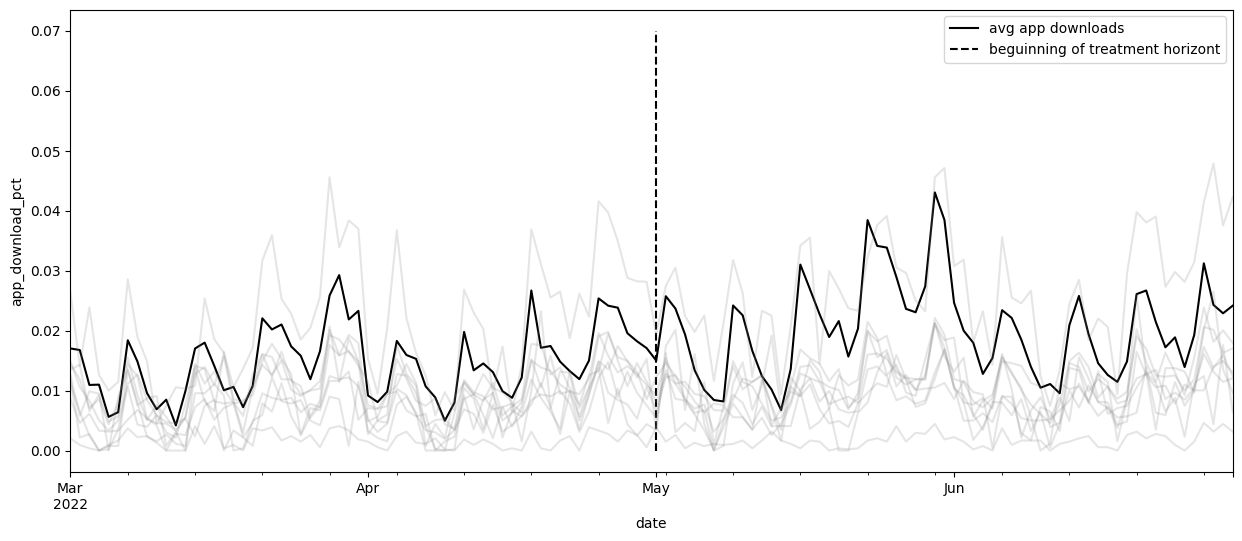

In [10]:

ax = df_sc[treated].mean(axis=1).plot(figsize=(15,6), label="avg app downloads")
ax.vlines(tr_period, 0, 0.07, ls="dashed", label="beguinning of treatment horizont")
ax.legend()
df_sc.drop(columns=treated).sample(frac=0.2, axis=1).plot(color="0.5", alpha=0.2, legend=False, ax=ax)
plt.ylabel("app_download_pct")

reshape data frame so as we can have one row per time period and one column per city while the outcome are the values of the table and then it partitions the table into treated and non treated

In [11]:
def reshape_sc_data(df: pd.DataFrame,
                    geo_col: str, 
                    time_col: str,
                    y_col: str,
                    tr_geos: str,
                    tr_start: str):
    df_pivot = df.pivot_table(index=time_col, columns=geo_col, values=y_col, aggfunc='mean')
    y_co = df_pivot.drop(columns=tr_geos)
    y_tr = df_pivot[tr_geos]
    
    y_pre_co = y_co[df_pivot.index < tr_start]
    y_pre_tr = y_tr[df_pivot.index < tr_start]
    
    y_post_co = y_co[df_pivot.index >= tr_start]
    y_post_tr = y_tr[df_pivot.index >= tr_start]
    
    return y_pre_co, y_pre_tr, y_post_co, y_post_tr

In [12]:
y_pre_co, y_pre_tr, y_post_co, y_post_tr = reshape_sc_data(
    df_norm,
    geo_col="city",
    time_col="date",
    y_col="app_download_pct",
    tr_geos=treated,
    tr_start=str(tr_period)
)

y_pre_tr.head()

city,sao_paulo,porto_alegre,joao_pessoa
date,,,
2022-03-01,0.024733,0.004288,0.022039
2022-03-02,0.021789,0.008107,0.020344
2022-03-03,0.015545,0.004891,0.012352
2022-03-04,0.011705,0.002948,0.018285
2022-03-05,0.010067,0.006767,0.000000


Synthetic control as linear regression

regression tries to minimize the squared difference between the outcome and the linear combination of regressors .. optimiztion problem.  
Syntetic control is a regression that uses the outcome of the control as features to try to predict the average outcome of the treated units 

Now using OLS (horizontal regresion)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(y_pre_co, y_pre_tr.mean(axis=1))

# extract the weights
weights_lr = model.coef_
weights_lr.round(3)

array([-0.65 , -0.058, -0.239,  0.971,  0.03 , -0.204,  0.007,  0.095,
        0.102,  0.106,  0.074,  0.079,  0.032, -0.5  , -0.041, -0.154,
       -0.014,  0.132,  0.115,  0.094,  0.151, -0.058, -0.353,  0.049,
       -0.476, -0.11 ,  0.158, -0.002,  0.036, -0.129, -0.066,  0.024,
       -0.047,  0.089, -0.057,  0.429,  0.23 , -0.086,  0.098,  0.351,
       -0.128,  0.128, -0.205,  0.088,  0.147,  0.555,  0.229])

this output is weights of each control city  
now lets use this weights to predict what would have happen in these cities 

In [17]:
# same as y0_tr_hat = model.predict(y_post_co)
y0_tr_hat = y_post_co.dot(weights_lr) # Synthetic control prediction
y0_tr_hat

date
2022-05-01    0.013356
2022-05-02    0.018682
2022-05-03    0.016760
2022-05-04    0.014669
2022-05-05    0.012445
                ...   
2022-06-26    0.019992
2022-06-27    0.029849
2022-06-28    0.024227
2022-06-29    0.028336
2022-06-30    0.029129
Length: 61, dtype: float64

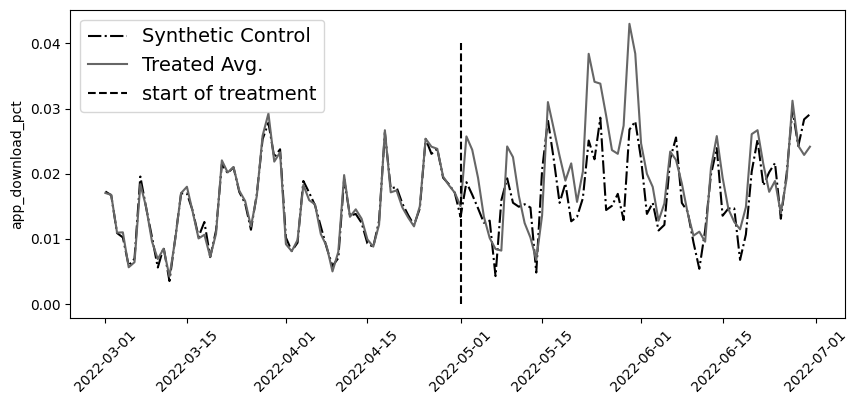

In [15]:
plt.figure(figsize=(10,4))

y_co = pd.concat([y_pre_co, y_post_co])
y_tr = pd.concat([y_pre_tr, y_post_tr])


plt.plot(y_co.index, model.predict(y_co), label="Synthetic Control", ls="-.")
plt.plot(y_tr.mean(axis=1), label="Treated Avg.")
plt.vlines(pd.to_datetime("2022-05-01"), 0, 0.04, ls="dashed", label="start of treatment")
plt.xticks(rotation=45)
plt.ylabel("app_download_pct")
plt.legend(fontsize=14)

In [18]:
att = y_post_tr.mean(axis=1) - y0_tr_hat

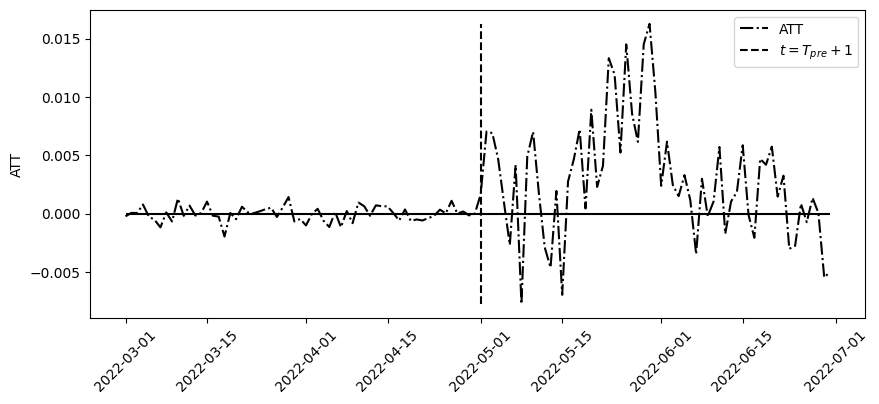

In [19]:
plt.figure(figsize=(10,4))
plt.plot(y_tr.mean(axis=1) - model.predict(y_co), label="ATT", ls="-.")
plt.vlines(pd.to_datetime("2022-05-01"), att.min(), att.max(), ls="dashed", label="$t=T_{pre}+1$")
plt.hlines(0, y_tr.index.min(), y_tr.index.max())
plt.ylabel("ATT")
plt.xticks(rotation=45)
plt.legend()

##### Canonical Syntheric Control: 
main dfference is that 1) weights are all positive -- 2)weights can add up to one. 

if the treatment units has an outcome greated or lower to than all the control units, this canonical formulation wont be able to calculate the syntetic control
Is a way of setting up a guardrail 

In [20]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array,
                                      check_is_fitted)
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
    
        w = cp.Variable(y_pre_co.shape[1])
        
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
        
        problem = cp.Problem(objective, constraints)
        
        self.loss_ = problem.solve(verbose=False)
        self.w_ = w.value
        
        self.is_fitted_ = True
        return self
        
        
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
        
        return y_co @ self.w_

In [21]:
model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr.mean(axis=1))

# extrac the weights
model.w_.round(3)

array([-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.076,  0.037,
        0.083,  0.01 , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
        0.061,  0.123,  0.008,  0.074, -0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.092,
       -0.   , -0.   ,  0.   ,  0.046,  0.089,  0.   ,  0.067,  0.061,
        0.   , -0.   , -0.   ,  0.088,  0.   ,  0.086, -0.   ])

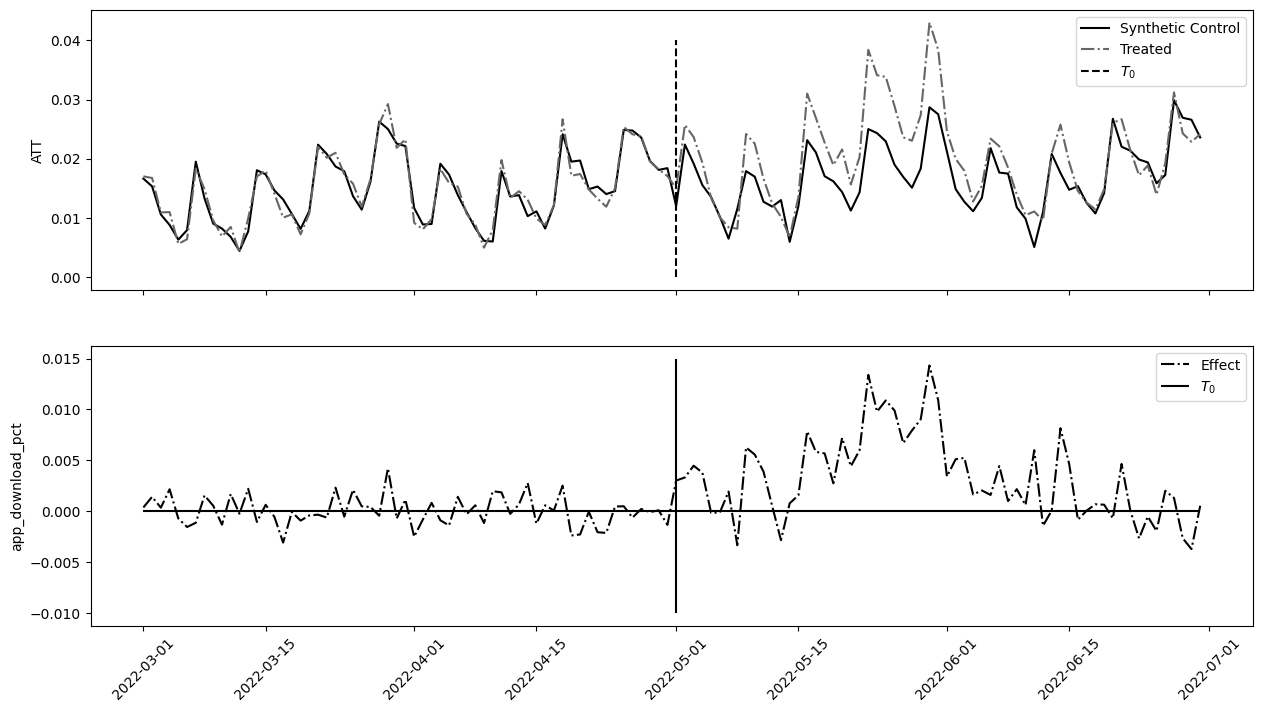

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8), sharex=True)

ax1.plot(y_co.index, model.predict(y_co), label="Synthetic Control")
ax1.plot(y_tr.mean(axis=1), label="Treated", ls="-.")
ax1.vlines(pd.to_datetime("2022-05-01"), 0, 0.04, ls="dashed", label="$T_0$")
ax1.legend()
ax1.set_ylabel("ATT")

ax2.plot(y_co.index, y_tr.mean(axis=1) - model.predict(y_co), label="Effect", ls="-.")
ax2.hlines(0, y_co.index.min(), y_co.index.max())
ax2.vlines(pd.to_datetime("2022-05-01"), -0.01, 0.015, label="$T_0$")
ax2.legend()
ax2.set_ylabel("app_download_pct")

plt.xticks(rotation=45);

##### With covariates, 
aading competitor app downloads

In [23]:
df_norm_cov = (pd.read_csv("online_mkt_cov.csv")
               .astype({"date":"datetime64[ns]"}))

df_norm_cov.head()

,app_download,population,city,state,date,post,treated,app_download_pct,comp_download_pct
0,3066.0,12396372,sao_paulo,sao_paulo,2022-03-01,0,1,0.024733,0.026280
1,2701.0,12396372,sao_paulo,sao_paulo,2022-03-02,0,1,0.021789,0.023925
2,1927.0,12396372,sao_paulo,sao_paulo,2022-03-03,0,1,0.015545,0.018930
3,1451.0,12396372,sao_paulo,sao_paulo,2022-03-04,0,1,0.011705,0.015858
4,1248.0,12396372,sao_paulo,sao_paulo,2022-03-05,0,1,0.010067,0.014548


create a matrix with both covariates: app downloads / app downloads comp.

We need to calculate a syntetic control that the weight w is not only multipliyed by the outcome value if also to the covariate value, so as to calculate the prediction for the outcome in the treated units
Issue is that Yco and Xco might be in very different scales so one might be more predictive than the other, That´s why we need to calculate an scaling fator V fr each covariate and the outcome value

1. create the X matrix for both covariates

In [30]:
from toolz import partial

reshaper = partial(reshape_sc_data,
                   df=df_norm_cov,
                   geo_col="city",
                   time_col="date",
                   tr_geos=treated,
                   tr_start=str(tr_period))

y_pre_co, y_pre_tr, y_post_co, y_post_tr = reshaper(
    y_col="app_download_pct"
)

x_pre_co, _, x_post_co, _ = reshaper(y_col="comp_download_pct")

function that, when given the VS, one for each covariate, gives us the synthetic control

In [34]:
def find_w_given_vs(vs, x_co_list, y_tr_pre):
    X_times_v = sum([x*v for x, v in zip(x_co_list, vs)])
    
    model = SyntheticControl()
    model.fit(X_times_v, y_tr_pre)
    
    return {"loss": model.loss_, "w": model.w_} 


find_w_given_vs([1, 0],
                [y_pre_co, x_pre_co],
                y_pre_tr.mean(axis=1)).get("w").round(3)

array([-0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.084,  0.039,
        0.085,  0.003, -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        0.062,  0.121, -0.   ,  0.072, -0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   ,  0.095,
        0.   , -0.   ,  0.   ,  0.022,  0.116, -0.   ,  0.068,  0.046,
       -0.   , -0.   , -0.   ,  0.088,  0.   ,  0.098, -0.   ])

now we can wrap the function find_w_given_vs in a funcition that takes the arrays of VS and returns the optimization loss. Then pass this function to scipy minimize function, with will iteratively look for the best VS and return the best to us

In [36]:
from scipy.optimize import minimize

def v_loss(vs):
    return find_w_given_vs(vs,
                           [y_pre_co, x_pre_co],
                           y_pre_tr.mean(axis=1)).get("loss")


v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
v_solution.x

array([1.88034651, 0.00269852])

we have the VS there and we can now go back to use the find_w_given_vs function to obtain the syntetic control weights that takes the covariance into account

In [27]:
w_cov = find_w_given_vs(v_solution.x,
                        [y_pre_co, x_pre_co],
                        y_pre_tr.mean(axis=1)).get("w").round(3)

w_cov

array([-0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.078,  0.001,
        0.033,  0.   , -0.   ,  0.034, -0.   , -0.   , -0.   ,  0.   ,
        0.016,  0.047,  0.03 ,  0.01 , -0.   , -0.   ,  0.   ,  0.055,
       -0.   ,  0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.046,
        0.078,  0.007,  0.   ,  0.   ,  0.138,  0.   ,  0.022,  0.008,
       -0.   ,  0.201,  0.   ,  0.035,  0.   ,  0.161, -0.   ])

In [39]:
y0_hat = sum([x*v for x, v 
              in zip([y_post_co, x_post_co], v_solution.x)]).dot(w_cov)

att = y_post_tr.mean(axis=1) - y0_hat
att

date
2022-05-01    0.002781
2022-05-02    0.003962
2022-05-03    0.004970
2022-05-04    0.004232
2022-05-05    0.000772
                ...   
2022-06-26    0.002222
2022-06-27    0.001951
2022-06-28   -0.002642
2022-06-29   -0.003055
2022-06-30    0.000213
Length: 61, dtype: float64

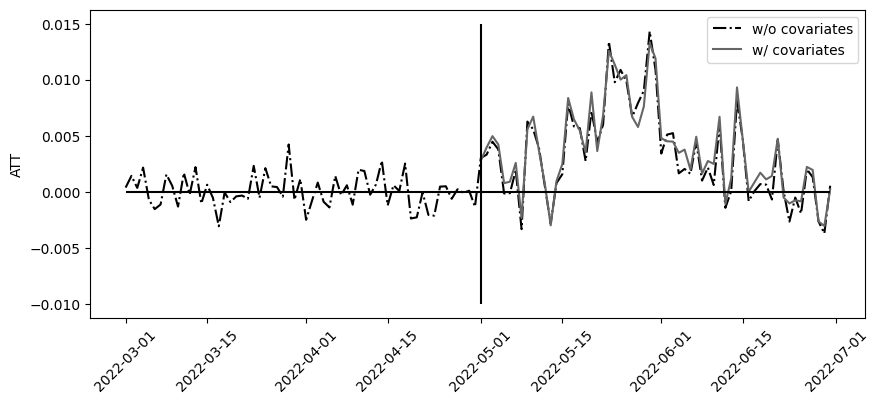

In [38]:
plt.figure(figsize=(10,4))
plt.plot(y_co.index, y_tr.mean(axis=1) - model.predict(y_co), label="w/o covariates", ls="-.")
plt.plot(att.index, att, label="w/ covariates")


plt.hlines(0, y_co.index.min(), y_co.index.max())
plt.vlines(pd.to_datetime("2022-05-01"), -0.01, 0.015)
plt.legend()
plt.ylabel("ATT")
plt.xticks(rotation=45);

##### Debiasing Syntetic control 
Speciallt is prone to overfitting when the pretreatment periods are small